# **Exercise 4: Demand Unconstraining**


## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing
from itertools import product

## Part I: Physical products with limited inventory
---
**Dataset:** `grocery_data`

### a. Double Exponential Smoothing (DES) Estimations

- Execute and report the same steps as seen in the companion code for the DES method on the Hyatt booking data.
- Try (alpha, beta) = 0.1 to 1 using 0.1 increments and forecast. Assume a burn-in period of 3 hours.
- Step 1: Tease out the constrained booking curves
- Step 2: Apply DES to the constrained curves; find best alpha and beta for each; predict
- Step 3: Summarize total estimated demand for all booking curves as a column onto the original dataset and report the results.

In [ ]:
# Loading the dataset
data = pd.read_excel('/content/grocery_data.xlsx')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       21 non-null     object 
 1   Hourly interval  21 non-null     int64  
 2   Unnamed: 2       21 non-null     int64  
 3   Unnamed: 3       21 non-null     int64  
 4   Unnamed: 4       21 non-null     int64  
 5   Unnamed: 5       21 non-null     int64  
 6   Unnamed: 6       21 non-null     int64  
 7   Unnamed: 7       21 non-null     int64  
 8   Unnamed: 8       21 non-null     int64  
 9   Unnamed: 9       20 non-null     float64
 10  Unnamed: 10      20 non-null     float64
 11  Unnamed: 11      17 non-null     float64
 12  Unnamed: 12      17 non-null     float64
 13  Unnamed: 13      15 non-null     float64
 14  Unnamed: 14      15 non-null     float64
 15  Unnamed: 15      11 non-null     float64
 16  Unnamed: 16      8 non-null      float64
 17  Total            2

,Unnamed: 0,Hourly interval,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Total
0,Day,1,2,3,4,5,6,7,8,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,NaN
1,1,2,4,4,2,4,2,4,1,5.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN,40.0
2,2,3,4,4,5,4,5,4,2,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,40.0
3,3,1,3,2,2,3,6,4,2,3.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,40.0
4,4,2,3,4,1,4,3,3,1,3.0,3.0,4.0,2.0,3.0,2.0,2.0,NaN,40.0


In [ ]:
# Removing first row and first column
# Now each row is a booking curve
data = data.iloc[1:,1:-1]
data.head()

,Hourly interval,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
1,2,4,4,2,4,2,4,1,5.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN
2,3,4,4,5,4,5,4,2,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,2,2,3,6,4,2,3.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN
4,2,3,4,1,4,3,3,1,3.0,3.0,4.0,2.0,3.0,2.0,2.0,NaN
5,2,5,5,3,5,5,5,2,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Renaming the columns
data.columns = np.arange(1,17)
data = data.add_prefix("hour")
data.head()

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16
1,2,4,4,2,4,2,4,1,5.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN
2,3,4,4,5,4,5,4,2,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,2,2,3,6,4,2,3.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN
4,2,3,4,1,4,3,3,1,3.0,3.0,4.0,2.0,3.0,2.0,2.0,NaN
5,2,5,5,3,5,5,5,2,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


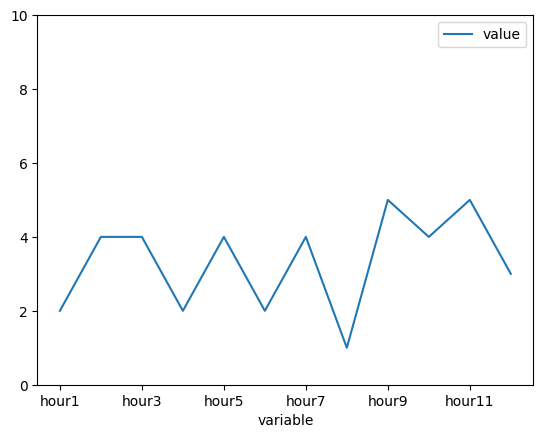

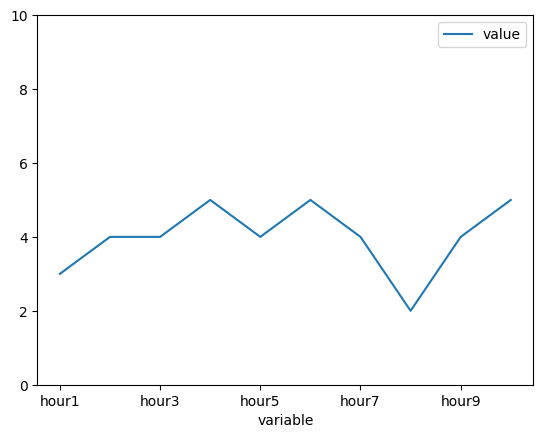

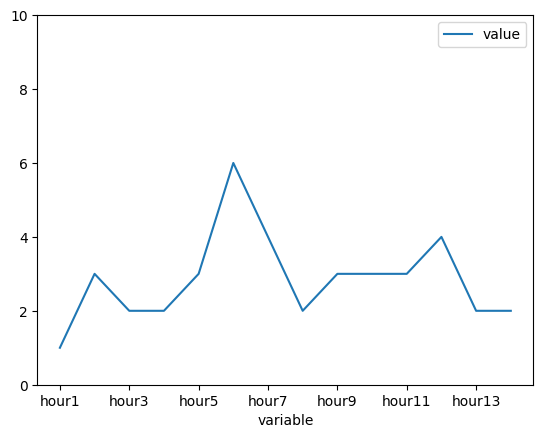

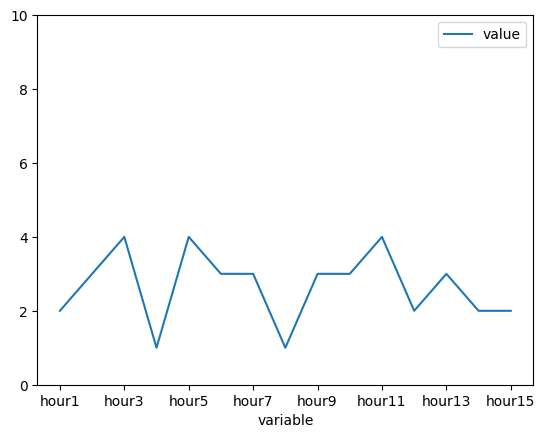

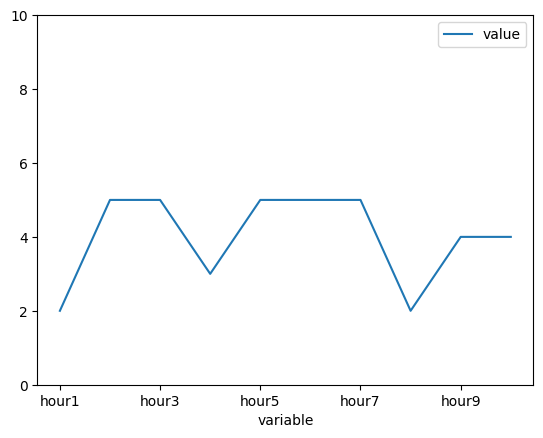

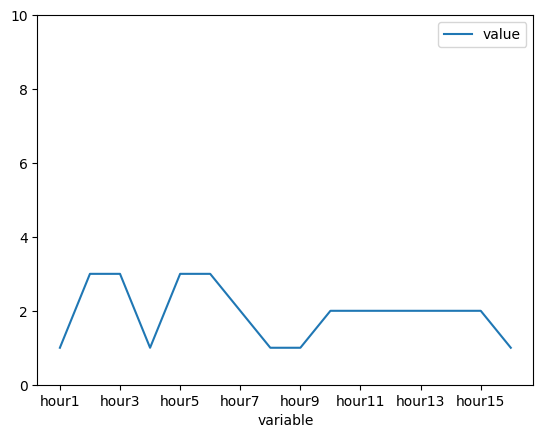

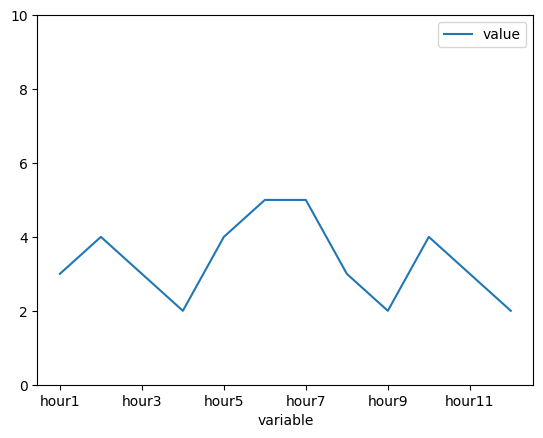

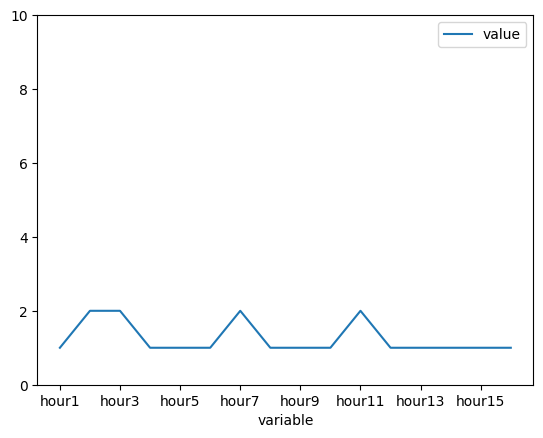

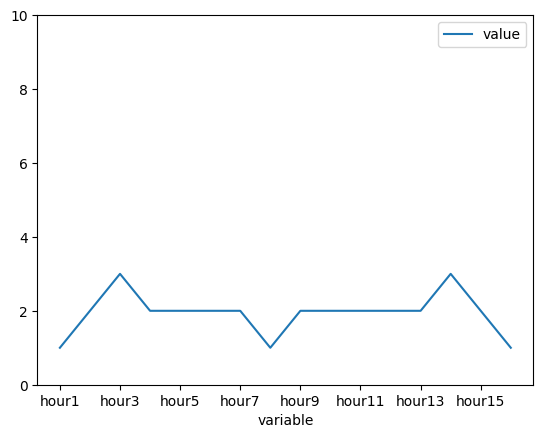

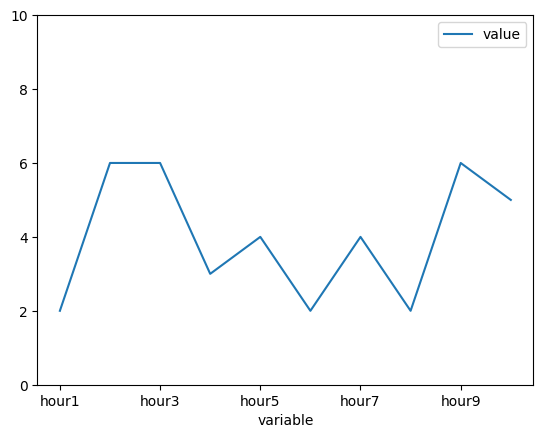

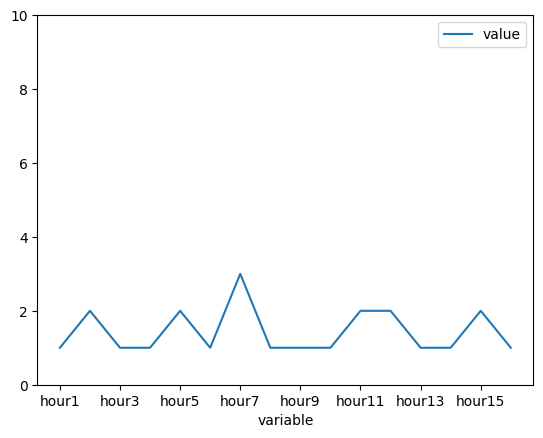

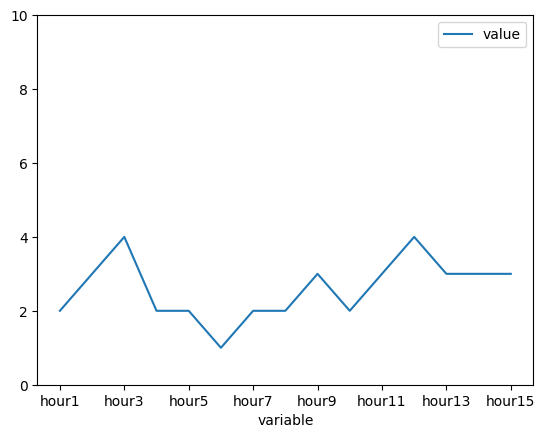

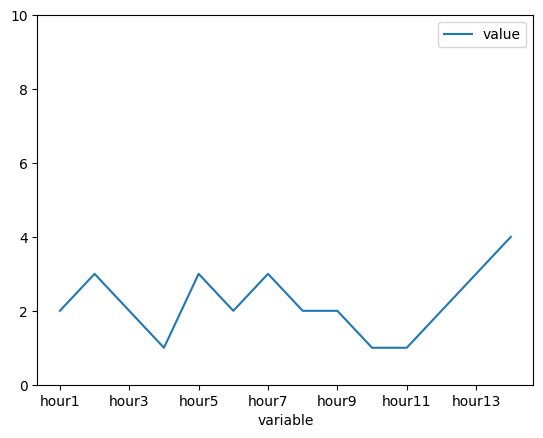

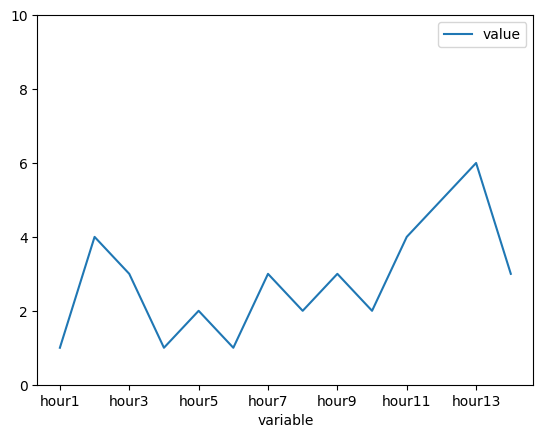

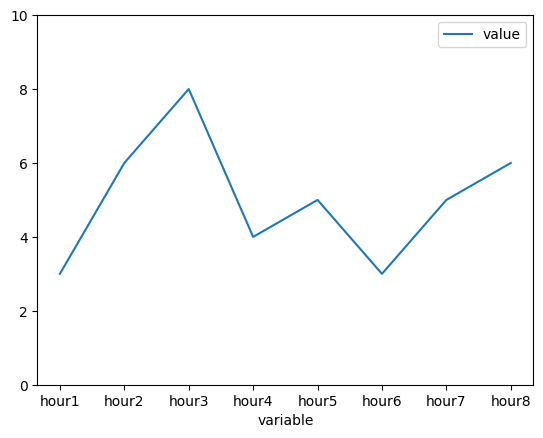

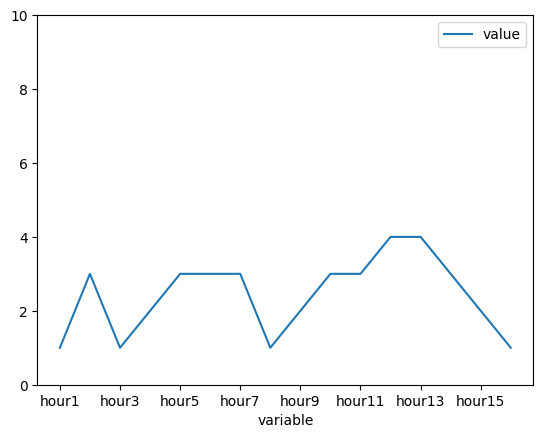

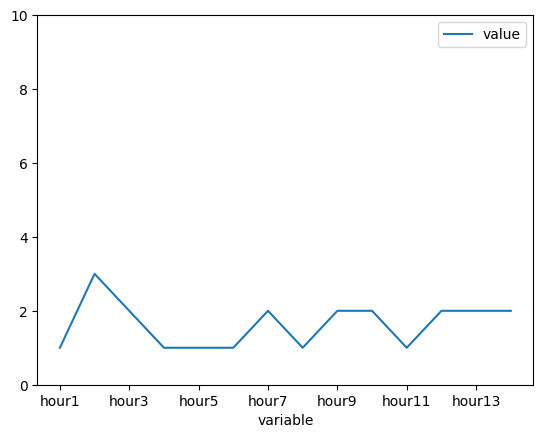

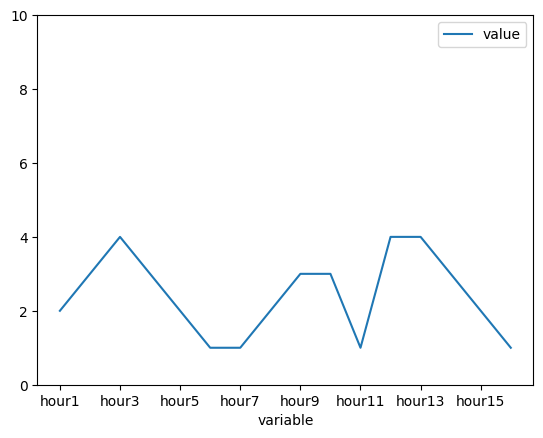

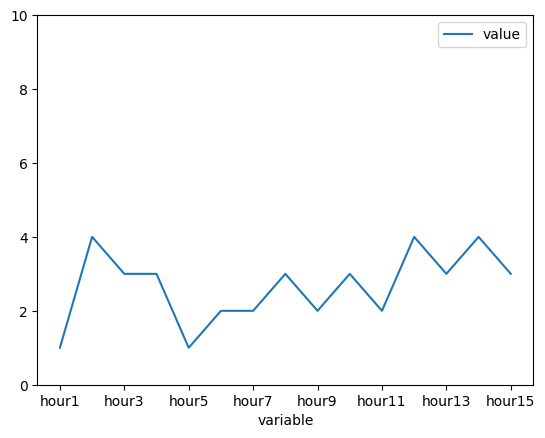

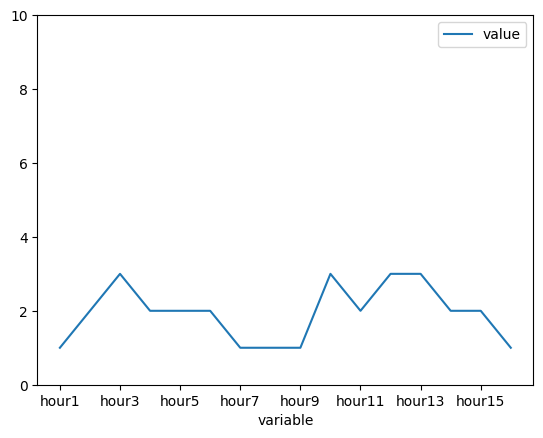

In [ ]:
# Eyeball the data (^_^)
data_ = data.reset_index()
data_ = pd.melt(data_, id_vars=['index'])
grocery_plot = data_.groupby('index').plot(x='variable', y='value', kind='line', ylim=(0,10))

In [ ]:
data

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16
1,2,4,4,2,4,2,4,1,5.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN
2,3,4,4,5,4,5,4,2,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,2,2,3,6,4,2,3.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN
4,2,3,4,1,4,3,3,1,3.0,3.0,4.0,2.0,3.0,2.0,2.0,NaN
5,2,5,5,3,5,5,5,2,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1,3,3,1,3,3,2,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
7,3,4,3,2,4,5,5,3,2.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN
8,1,2,2,1,1,1,2,1,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
9,1,2,3,2,2,2,2,1,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0
10,2,6,6,3,4,2,4,2,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Step 1: Tease out the constrained booking curves
# Adjust the grocery data of sales by removing the sales possibly affected by out-of-stock
# Check at which hour the demand becomes censored
# Note that most summarize methods could be applied row-wise with axis = 1

df_count = data.count(axis=1)

for i in range(1,21):
    if data.isnull().any(axis = 1).loc[i]:
        data.loc[i, 'hour' + df_count[i].astype(str)] = np.nan

# verify that capturing hour the demand becomes censored
data

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16
1,2,4,4,2,4,2,4,1.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN
2,3,4,4,5,4,5,4,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,2,2,3,6,4,2.0,3.0,3.0,3.0,4.0,2.0,NaN,NaN,NaN
4,2,3,4,1,4,3,3,1.0,3.0,3.0,4.0,2.0,3.0,2.0,NaN,NaN
5,2,5,5,3,5,5,5,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,3,3,1,3,3,2,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
7,3,4,3,2,4,5,5,3.0,2.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN
8,1,2,2,1,1,1,2,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
9,1,2,3,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0
10,2,6,6,3,4,2,4,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Calculate hourly cumulative demand
df_cumsales = np.cumsum(data, axis=1)
df_cumsales

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16
1,2.0,6.0,10.0,12.0,16.0,18.0,22.0,23.0,28.0,32.0,37.0,NaN,NaN,NaN,NaN,NaN
2,3.0,7.0,11.0,16.0,20.0,25.0,29.0,31.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,4.0,6.0,8.0,11.0,17.0,21.0,23.0,26.0,29.0,32.0,36.0,38.0,NaN,NaN,NaN
4,2.0,5.0,9.0,10.0,14.0,17.0,20.0,21.0,24.0,27.0,31.0,33.0,36.0,38.0,NaN,NaN
5,2.0,7.0,12.0,15.0,20.0,25.0,30.0,32.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,4.0,7.0,8.0,11.0,14.0,16.0,17.0,18.0,20.0,22.0,24.0,26.0,28.0,30.0,31.0
7,3.0,7.0,10.0,12.0,16.0,21.0,26.0,29.0,31.0,35.0,38.0,NaN,NaN,NaN,NaN,NaN
8,1.0,3.0,5.0,6.0,7.0,8.0,10.0,11.0,12.0,13.0,15.0,16.0,17.0,18.0,19.0,20.0
9,1.0,3.0,6.0,8.0,10.0,12.0,14.0,15.0,17.0,19.0,21.0,23.0,25.0,28.0,30.0,31.0
10,2.0,8.0,14.0,17.0,21.0,23.0,27.0,29.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Creating a 'censored' column to indicate whether demand was censored on a given day
df_cumsales['censored'] = pd.isna(data['hour16'])
df_cumsales

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16,censored
1,2.0,6.0,10.0,12.0,16.0,18.0,22.0,23.0,28.0,32.0,37.0,NaN,NaN,NaN,NaN,NaN,True
2,3.0,7.0,11.0,16.0,20.0,25.0,29.0,31.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,1.0,4.0,6.0,8.0,11.0,17.0,21.0,23.0,26.0,29.0,32.0,36.0,38.0,NaN,NaN,NaN,True
4,2.0,5.0,9.0,10.0,14.0,17.0,20.0,21.0,24.0,27.0,31.0,33.0,36.0,38.0,NaN,NaN,True
5,2.0,7.0,12.0,15.0,20.0,25.0,30.0,32.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
6,1.0,4.0,7.0,8.0,11.0,14.0,16.0,17.0,18.0,20.0,22.0,24.0,26.0,28.0,30.0,31.0,False
7,3.0,7.0,10.0,12.0,16.0,21.0,26.0,29.0,31.0,35.0,38.0,NaN,NaN,NaN,NaN,NaN,True
8,1.0,3.0,5.0,6.0,7.0,8.0,10.0,11.0,12.0,13.0,15.0,16.0,17.0,18.0,19.0,20.0,False
9,1.0,3.0,6.0,8.0,10.0,12.0,14.0,15.0,17.0,19.0,21.0,23.0,25.0,28.0,30.0,31.0,False
10,2.0,8.0,14.0,17.0,21.0,23.0,27.0,29.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [ ]:
# # Step 2: apply DES to the constrained curves; find best alpha and beta for each; predict
# ## DES method for demand uncensoring
# # copy the data censored series
# df_des = data[data.isnull().any(axis = 1) == True]

# Step 2: apply DES to the constrained curves; find best alpha and beta for each; predict
## DES method for demand uncensoring
# Copy the censored series (rows)
df_des = df_cumsales[df_cumsales.censored].drop('censored',axis=1)
df_des

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16
1,2.0,6.0,10.0,12.0,16.0,18.0,22.0,23.0,28.0,32.0,37.0,NaN,NaN,NaN,NaN,NaN
2,3.0,7.0,11.0,16.0,20.0,25.0,29.0,31.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,4.0,6.0,8.0,11.0,17.0,21.0,23.0,26.0,29.0,32.0,36.0,38.0,NaN,NaN,NaN
4,2.0,5.0,9.0,10.0,14.0,17.0,20.0,21.0,24.0,27.0,31.0,33.0,36.0,38.0,NaN,NaN
5,2.0,7.0,12.0,15.0,20.0,25.0,30.0,32.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.0,7.0,10.0,12.0,16.0,21.0,26.0,29.0,31.0,35.0,38.0,NaN,NaN,NaN,NaN,NaN
10,2.0,8.0,14.0,17.0,21.0,23.0,27.0,29.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2.0,5.0,9.0,11.0,13.0,14.0,16.0,18.0,21.0,23.0,26.0,30.0,33.0,36.0,NaN,NaN
13,2.0,5.0,7.0,8.0,11.0,13.0,16.0,18.0,20.0,21.0,22.0,24.0,27.0,NaN,NaN,NaN
14,1.0,5.0,8.0,9.0,11.0,12.0,15.0,17.0,20.0,22.0,26.0,31.0,37.0,NaN,NaN,NaN


In [ ]:
# Strategy:
# Creating a big loop that takes a censored curve as input and fills in the nan's

# Function that takes alpha, beta, series as input and produces the traning sample MSE
# Allow 3 periods (hours) for burn-in
def DESMSE(alpha, beta, series):
    return mean_squared_error(series[3:],
                              ExponentialSmoothing(series, trend="add",
                                                   initialization_method='estimated').fit(smoothing_level = alpha,
                                                                                          smoothing_trend = beta).predict(3, series.size-1))

# Function to construct a dataframe of alpha-beta combinations
def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())],
                       columns=dictionary.keys())

# Defining the alpha and beta values to try as a dictionary
dictionary = {'alpha': np.arange(0.1, 1.1, 0.1),
              'beta': np.arange(0.1, 1.1, 0.1)}


# Predicting curve by curve
# NOTE: The shape attribute for numpy arrays returns the dimensions of the array. If a df has n rows and m columns, then df.shape is (n,m). So Y.shape[0] is n
for row_number in np.arange(0, df_des.shape[0]):
    # take out a censored curve, drop nan values
    temp = df_des.iloc[row_number,:].dropna().reset_index(drop=True)

    # convert cumulative booking into daily booking
    # .diff() will work too
    # temp[1:] gets booking vlaues for days 2-40, temp[:-1] gets booking vlaues for days 1-39,
    temp = np.append(temp[0], temp[1:].values - temp[:-1].values)

    # construct alpha, beta values to try
    des_results = expand_grid(dictionary)

    # add a column called mse, as a place holder for putting in the MSE results later
    des_results["mse"] = np.repeat(0, len(des_results))

    # reuse the DESMSE function above to cycle through all alpha beta values
    # (alpha,beta,series) = (alpha,beta,temp)
    for alpha in np.arange(0.1, 1.1, 0.1):
        for beta in np.arange(0.1, 1.1, 0.1):
           des_results.loc[(des_results["alpha"] == alpha) & (des_results["beta"] == beta),"mse"] = DESMSE(alpha,beta,temp)

    # find the best (alpha beta): sort and put on row 1
    des_results = des_results.sort_values("mse")

    # use the best (alpha,beta) to forecast for the censored days
    # post results onto df_des
    # forecast(40-temp.size) ensures that we forecast the censored days
    predicted_hourly_arrival = ExponentialSmoothing(temp, trend="add", initialization_method='estimated'). \
                                          fit(smoothing_level = des_results.iloc[0,0],
                                              smoothing_trend = des_results.iloc[0,1]). \
                                          forecast(16 - temp.size)

    # cumsum the daily arrival and add back to the last value that's not nan
    df_des.iloc[row_number,temp.size:] = predicted_hourly_arrival.cumsum() + df_des.iloc[row_number, temp.size-1]

In [ ]:
des_results.sort_values('mse', ascending=True)

,alpha,beta,mse
0,0.1,0.1,0.662607
1,0.1,0.2,0.678892
2,0.1,0.3,0.693150
3,0.1,0.4,0.704566
9,0.1,1.0,0.704774
...,...,...,...
96,1.0,0.7,2.868665
89,0.9,1.0,2.895811
97,1.0,0.8,3.269995
98,1.0,0.9,3.810564


In [ ]:
df_des

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16
1,2.0,6.0,10.0,12.0,16.0,18.0,22.0,23.000000,28.000000,32.000000,37.000000,41.213765,45.572536,50.076313,54.725097,59.518887
2,3.0,7.0,11.0,16.0,20.0,25.0,29.0,31.000000,35.000000,38.730226,42.425552,46.085980,49.711508,53.302137,56.857866,60.378697
3,1.0,4.0,6.0,8.0,11.0,17.0,21.0,23.000000,26.000000,29.000000,32.000000,36.000000,38.000000,41.484644,45.042991,48.675040
4,2.0,5.0,9.0,10.0,14.0,17.0,20.0,21.000000,24.000000,27.000000,31.000000,33.000000,36.000000,38.000000,40.656035,43.302608
5,2.0,7.0,12.0,15.0,20.0,25.0,30.0,32.000000,36.000000,40.094659,44.204113,48.328362,52.467405,56.621242,60.789874,64.973301
7,3.0,7.0,10.0,12.0,16.0,21.0,26.0,29.000000,31.000000,35.000000,38.000000,41.466845,44.933120,48.398825,51.863958,55.328522
10,2.0,8.0,14.0,17.0,21.0,23.0,27.0,29.000000,35.000000,38.780462,42.540992,46.281591,50.002259,53.702995,57.383800,61.044674
12,2.0,5.0,9.0,11.0,13.0,14.0,16.0,18.000000,21.000000,23.000000,26.000000,30.000000,33.000000,36.000000,38.985114,42.029603
13,2.0,5.0,7.0,8.0,11.0,13.0,16.0,18.000000,20.000000,21.000000,22.000000,24.000000,27.000000,28.870611,30.713163,32.527658
14,1.0,5.0,8.0,9.0,11.0,12.0,15.0,17.000000,20.000000,22.000000,26.000000,31.000000,37.000000,43.031975,50.183874,58.455696


In [ ]:
df_des_hourly = df_des

In [ ]:
# Step 3: Summarize total estimated demand for all booking curves
# Post results to data
# don't forget to round the unconstrained demand estimate for each censored day

df_cumsales['des'] = df_cumsales['hour16']
df_cumsales.loc[df_cumsales.censored,'des'] = df_des['hour16'].round()
df_cumsales.head(20)

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16,censored,des
1,2.0,6.0,10.0,12.0,16.0,18.0,22.0,23.0,28.0,32.0,37.0,NaN,NaN,NaN,NaN,NaN,True,60.0
2,3.0,7.0,11.0,16.0,20.0,25.0,29.0,31.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,60.0
3,1.0,4.0,6.0,8.0,11.0,17.0,21.0,23.0,26.0,29.0,32.0,36.0,38.0,NaN,NaN,NaN,True,49.0
4,2.0,5.0,9.0,10.0,14.0,17.0,20.0,21.0,24.0,27.0,31.0,33.0,36.0,38.0,NaN,NaN,True,43.0
5,2.0,7.0,12.0,15.0,20.0,25.0,30.0,32.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,65.0
6,1.0,4.0,7.0,8.0,11.0,14.0,16.0,17.0,18.0,20.0,22.0,24.0,26.0,28.0,30.0,31.0,False,31.0
7,3.0,7.0,10.0,12.0,16.0,21.0,26.0,29.0,31.0,35.0,38.0,NaN,NaN,NaN,NaN,NaN,True,55.0
8,1.0,3.0,5.0,6.0,7.0,8.0,10.0,11.0,12.0,13.0,15.0,16.0,17.0,18.0,19.0,20.0,False,20.0
9,1.0,3.0,6.0,8.0,10.0,12.0,14.0,15.0,17.0,19.0,21.0,23.0,25.0,28.0,30.0,31.0,False,31.0
10,2.0,8.0,14.0,17.0,21.0,23.0,27.0,29.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,61.0


### b. Averaging Method Estimations

- Execute and report the same steps as seen in the companion code for the Averaging
method on the Hyatt booking data
- Since there is not a specific booking limit (as in the case of the booking data), you will be handling the last hour before censoring occurred each day when starting your prediction
- Step 1: slice booking curve into segments (in hourly increments)
- Step 2: Calculate unconstrained arrivals
- Step 3: Repeat algorithmic steps until you have reached final demand and report as a column onto the original dataset

In [ ]:
# # hourly_sales_original captures the last hour sales before censoring
# df_grocery_original = pd.read_excel(“grocery_data.xlsx”).iloc[1:,1:17]
# df_grocery_original.columns = np.arange(1,17)
# df_avg = pd.merge(df_avg,
#          pd.melt(df_grocery_original.reset_index(),id_vars=‘index’,var_name = ‘hour’,value_name=‘hourly_sales_original’).sort_values(by=[‘index’,‘hour’]).reset_index(drop=True),
#          how=“left”,on=[‘index’,‘hour’])

# # for the censored rows, replace hourly_sales with max(original,average) ... : This would be the next step to complete Part Ib

In [ ]:
# AVERAGING method for demand uncensoring
# Uses the unconstrained curve to make prediction

# Step 1: slice booking curve into segments
# In the example during class (manual calculations), we considered segments in 5 day increments
# When leveraging python, we simply segment in daily increments
# Start by linking the daily booking average to the censored data in Ia
df_avg = df_cumsales.drop(['censored', 'des'], axis=1)

# convert column names to 1:40
df_avg.columns = np.arange(1,17)

# convert dataframe from 'wide' to 'long'
df_avg = pd.melt(df_avg.reset_index(), id_vars='index', var_name = 'hour', value_name='cumsales')

# sort by curve and day
df_avg = df_avg.sort_values(by=['index','hour'])

# ensure conversion done as expected
df_avg.head(16)

,index,hour,cumsales
0,1,1,2.0
20,1,2,6.0
40,1,3,10.0
60,1,4,12.0
80,1,5,16.0
100,1,6,18.0
120,1,7,22.0
140,1,8,23.0
160,1,9,28.0
180,1,10,32.0


In [ ]:
# Step 2: Calculate unconstrained demand
# Check which curves are censored, create boolean variable identifying censored cases
df_avg['censor'] = pd.isna(df_avg.cumsales)
df_avg.head(16)

,index,hour,cumsales,censor
0,1,1,2.0,False
20,1,2,6.0,False
40,1,3,10.0,False
60,1,4,12.0,False
80,1,5,16.0,False
100,1,6,18.0,False
120,1,7,22.0,False
140,1,8,23.0,False
160,1,9,28.0,False
180,1,10,32.0,False


In [ ]:
# Hourly Sales
# Calculates the additional demand compared to the previous hour, if any
df_avg['hourly_sales'] = df_avg.groupby('index').cumsales.diff()
df_avg.loc[pd.isna(df_avg.hourly_sales),'hourly_sales'] = df_avg.loc[pd.isna(df_avg.hourly_sales),'cumsales']
df_avg.head(30)

,index,hour,cumsales,censor,hourly_sales
0,1,1,2.0,False,2.0
20,1,2,6.0,False,4.0
40,1,3,10.0,False,4.0
60,1,4,12.0,False,2.0
80,1,5,16.0,False,4.0
100,1,6,18.0,False,2.0
120,1,7,22.0,False,4.0
140,1,8,23.0,False,1.0
160,1,9,28.0,False,5.0
180,1,10,32.0,False,4.0


In [ ]:
# Average hourly sales across uncensored curves
temp = df_avg[df_avg.censor==False].groupby('hour').hourly_sales.mean()
temp = temp.reset_index().rename(columns = {'index' : "hour", 'hourly_sales' : 'hourly_sales_avg'})
temp

,hour,hourly_sales_avg
0,1,1.650000
1,2,3.450000
2,3,3.350000
3,4,2.100000
4,5,2.850000
5,6,2.550000
6,7,3.000000
7,8,1.631579
8,9,2.631579
9,10,2.437500


In [ ]:
# Add the hourly_sales_avg column to df_avg using pd.merge
temp['hour'] = temp.hour.astype('object')
df_avg = pd.merge(df_avg, temp, how='left', on='hour')
df_avg.head(20)

,index,hour,cumsales,censor,hourly_sales,hourly_sales_avg
0,1,1,2.0,False,2.0,1.650000
1,1,2,6.0,False,4.0,3.450000
2,1,3,10.0,False,4.0,3.350000
3,1,4,12.0,False,2.0,2.100000
4,1,5,16.0,False,4.0,2.850000
5,1,6,18.0,False,2.0,2.550000
6,1,7,22.0,False,4.0,3.000000
7,1,8,23.0,False,1.0,1.631579
8,1,9,28.0,False,5.0,2.631579
9,1,10,32.0,False,4.0,2.437500


In [ ]:
# For the censored rows, replace daily_booking with max(actual,average)
# This calculates the unconstrained arrivals amount for the censored periods
df_avg.loc[df_avg.censor, 'hourly_sales'] = df_avg.loc[df_avg.censor, ['hourly_sales','hourly_sales_avg']].max(axis=1)
df_avg.head(16)

,index,hour,cumsales,censor,hourly_sales,hourly_sales_avg
0,1,1,2.0,False,2.000000,1.650000
1,1,2,6.0,False,4.000000,3.450000
2,1,3,10.0,False,4.000000,3.350000
3,1,4,12.0,False,2.000000,2.100000
4,1,5,16.0,False,4.000000,2.850000
5,1,6,18.0,False,2.000000,2.550000
6,1,7,22.0,False,4.000000,3.000000
7,1,8,23.0,False,1.000000,1.631579
8,1,9,28.0,False,5.000000,2.631579
9,1,10,32.0,False,4.000000,2.437500


In [ ]:
# Step 3: Repeat alogrithmic steps until you have reached final demand
# Update booking by accumulating the updated daily booking
df_avg['cumsales'] = df_avg.groupby('index').hourly_sales.cumsum()

# Post results to df_cumsales
df_cumsales['avg'] = df_avg.groupby('index').cumsales.tail(1).values.round()
df_cumsales.head()

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16,censored,des,avg
1,2.0,6.0,10.0,12.0,16.0,18.0,22.0,23.0,28.0,32.0,37.0,NaN,NaN,NaN,NaN,NaN,True,60.0,48.0
2,3.0,7.0,11.0,16.0,20.0,25.0,29.0,31.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,60.0,51.0
3,1.0,4.0,6.0,8.0,11.0,17.0,21.0,23.0,26.0,29.0,32.0,36.0,38.0,NaN,NaN,NaN,True,49.0,43.0
4,2.0,5.0,9.0,10.0,14.0,17.0,20.0,21.0,24.0,27.0,31.0,33.0,36.0,38.0,NaN,NaN,True,43.0,41.0
5,2.0,7.0,12.0,15.0,20.0,25.0,30.0,32.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,65.0,52.0


### c. Comparing DES and Averaging Method Results

Comment on the meaning of the end numbers reported for both DES and Averaging method approaches (not the specific meaning for each number calculated, rather what the numbers are meant to represent). Also, offer an explanation for why the end numbers reported for both methods differ.

In [ ]:
# Compare results of AVERAGING and DES method
df_cumsales

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16,censored,des,avg
1,2.0,6.0,10.0,12.0,16.0,18.0,22.0,23.0,28.0,32.0,37.0,NaN,NaN,NaN,NaN,NaN,True,60.0,48.0
2,3.0,7.0,11.0,16.0,20.0,25.0,29.0,31.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,60.0,51.0
3,1.0,4.0,6.0,8.0,11.0,17.0,21.0,23.0,26.0,29.0,32.0,36.0,38.0,NaN,NaN,NaN,True,49.0,43.0
4,2.0,5.0,9.0,10.0,14.0,17.0,20.0,21.0,24.0,27.0,31.0,33.0,36.0,38.0,NaN,NaN,True,43.0,41.0
5,2.0,7.0,12.0,15.0,20.0,25.0,30.0,32.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,65.0,52.0
6,1.0,4.0,7.0,8.0,11.0,14.0,16.0,17.0,18.0,20.0,22.0,24.0,26.0,28.0,30.0,31.0,False,31.0,31.0
7,3.0,7.0,10.0,12.0,16.0,21.0,26.0,29.0,31.0,35.0,38.0,NaN,NaN,NaN,NaN,NaN,True,55.0,49.0
8,1.0,3.0,5.0,6.0,7.0,8.0,10.0,11.0,12.0,13.0,15.0,16.0,17.0,18.0,19.0,20.0,False,20.0,20.0
9,1.0,3.0,6.0,8.0,10.0,12.0,14.0,15.0,17.0,19.0,21.0,23.0,25.0,28.0,30.0,31.0,False,31.0,31.0
10,2.0,8.0,14.0,17.0,21.0,23.0,27.0,29.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,61.0,51.0


**Conclusion**

The comparison presented above highlights the forecast differences between Double Exponential Smoothing and the Averaging Method. Notably, the forecasts generated by Double Exponential Smoothing consistently surpass those produced by the Averaging Method. This discrepancy indicates that Double Exponential Smoothing adopts a more assertive forecasting strategy, projecting demand patterns with greater aggressiveness, while the Averaging Method tends to offer more cautious forecasts.

The differences in the end numbers between the "DES" and "AVG" columns can be explained by the inherent differences in their calculation approaches: The DES method places more weight on more recent data points, effectively smoothing out the fluctuations in the time series.
The AVG method treats all data points equally, without any weighting or smoothing.

These distinct methodological differences are the primary reason why the final average values reported in the "DES" and "AVG" columns differ. The DES approach produces smoother, potentially more stable average values, while the AVG approach may be more sensitive to outliers or sudden changes in the data.